In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_8_WT_150k_CS1.csv"
df = pd.read_csv(path)

## Filtern und Vorbereiten der Analyse

In [3]:
# Fahrten auf solche mit anschließendem Ladevorgang filtern
filt = df["Charge_start"].notnull()
df_filt = df[filt]

In [4]:
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
1,0.2,2,2,1,1000.0,67,1018.0,18.0,10.04,54.0,90.4,86.3,1018.0,1072.0
3,0.4,4,3,1,1099.0,73,1102.0,3.0,1.57,715.0,92.5,91.9,1102.0,1139.0
5,1.2,2,2,1,1259.0,84,1270.0,11.0,6.37,701.0,77.9,73.7,1270.0,1377.0
9,2.4,4,4,1,687.0,46,693.0,6.0,3.68,1150.0,91.0,89.9,693.0,775.0
12,3.3,3,4,1,901.0,60,911.0,10.0,5.49,1251.0,91.6,88.9,911.0,960.0


In [5]:
# Anzahl Fahrzeuge entspricht Anzahl der ersten Trips
no_cars = len(df[df["Trip_no"]==1])

In [6]:
# reduzierte Liste neu indizieren
df_filt.reset_index(drop=True, inplace=True)
df_filt.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.2,2,2,1,1000.0,67,1018.0,18.0,10.04,54.0,90.4,86.3,1018.0,1072.0
1,0.4,4,3,1,1099.0,73,1102.0,3.0,1.57,715.0,92.5,91.9,1102.0,1139.0
2,1.2,2,2,1,1259.0,84,1270.0,11.0,6.37,701.0,77.9,73.7,1270.0,1377.0
3,2.4,4,4,1,687.0,46,693.0,6.0,3.68,1150.0,91.0,89.9,693.0,775.0
4,3.3,3,4,1,901.0,60,911.0,10.0,5.49,1251.0,91.6,88.9,911.0,960.0


## Ermitteln der Anzahl ladender Fahrzeuge über Zeitverlauf

In [7]:
# erhöhen des cars_charging Zähler um 1 für jeden Ladevorgang zwischen Charge_start und Charge_end
def calc_cars_charging(df_filt):
    # initialisieren Liste 
    cars_charging = [0 for i in range(1441)]
    for i in range(len(df_filt)):
        if df_filt.at[i, "Charge_start"] < df_filt.at[i, "Charge_end"]:
            for j in range(int(df_filt.at[i, "Charge_start"]), int(df_filt.at[i, "Charge_end"]) + 1):
                cars_charging[j] += 1
        else: 
            for j in range(int(df_filt.at[i, "Charge_start"]), 1441):
                cars_charging[j] += 1
            for j in range(0, int(df_filt.at[i, "Charge_end"])):
                cars_charging[j] += 1
    return cars_charging

In [8]:
cars_charging_total = calc_cars_charging(df_filt)
# normieren des Ergebnis auf Anzahl simulierter Fahrzeuge
# ACHTUNG: Wert anpassen, bei Anpassung der Simulation (Globalvariable in Ergebnis speichern und hier über Variable definieren?)
relative_cars_charging_total = [x/no_cars for x in cars_charging_total]

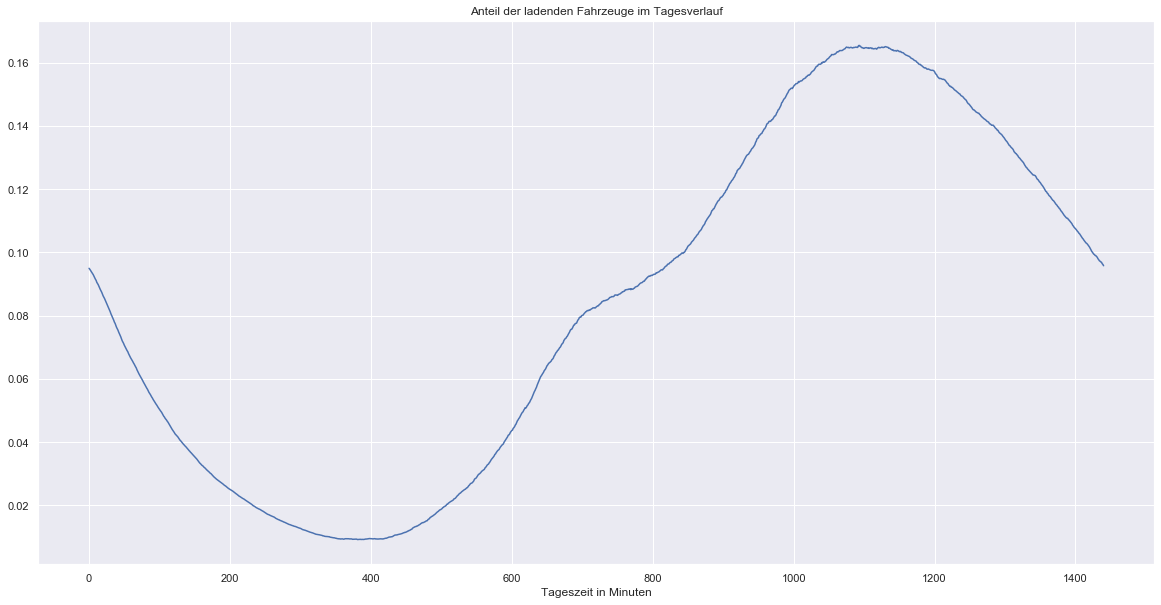

In [9]:
# Visualisieren
sns.set()
plt.figure(figsize=(20,10))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging_total);

## Vergleich mit Ausgangsdatensatz

In [10]:
import pickle
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsauswertung\EBZ NHTS\Werktag\Auswertungsergebnisse\Ladende_Fahrzeuge_CS1.pickle"
nhts_ebz = pickle.load(open(path, "rb"))

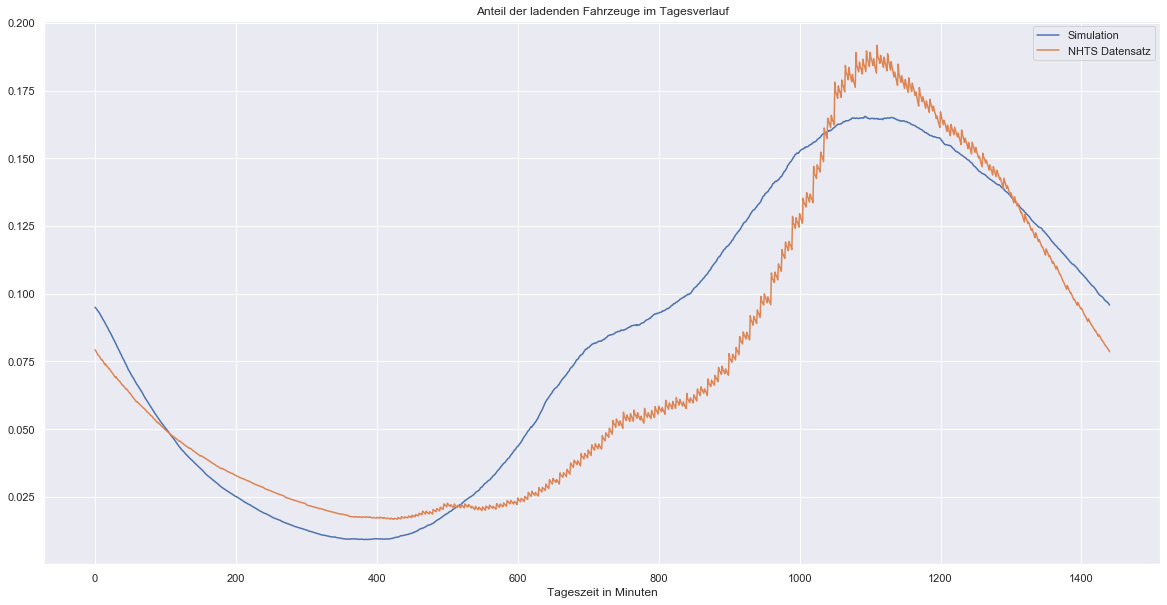

In [14]:
plt.figure(figsize=(20,10))
x = np.linspace(0, 1440, 1441)
plt.title("Anteil der ladenden Fahrzeuge im Tagesverlauf")
plt.xlabel("Tageszeit in Minuten")
plt.plot(x, relative_cars_charging_total, label="Simulation");
plt.plot(x, nhts_ebz, label="NHTS Datensatz");
plt.legend();

In [15]:
sum(relative_cars_charging_total)

119.90778666666667

In [16]:
sum(nhts_ebz)

107.63163365832125

In [17]:
sum(relative_cars_charging_total)/sum(nhts_ebz)

1.114057109337542